In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('bank_data.csv')

In [3]:
data.head()

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
0,2030,194,263.540,Level 0 Recovery,19,Male
1,1150,486,416.090,Level 0 Recovery,25,Female
2,380,527,429.350,Level 0 Recovery,27,Male
3,1838,536,296.990,Level 0 Recovery,25,Male
4,1995,541,346.385,Level 0 Recovery,34,Male


In [4]:
data.describe()

,id,expected_recovery_amount,actual_recovery_amount,age
count,1882.000000,1882.000000,1882.000000,1882.000000
mean,1035.596174,2759.967588,4000.967837,39.650372
std,591.458429,2019.826565,4576.506350,15.453072
min,6.000000,194.000000,200.425000,18.000000
25%,534.250000,1261.250000,1045.190300,28.000000
50%,1029.500000,2062.000000,2115.446373,35.000000
75%,1551.750000,3569.500000,5417.237207,50.000000
max,2056.000000,9964.000000,34398.479710,84.000000


In [5]:
data.shape

(1882, 6)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1882 entries, 0 to 1881
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1882 non-null   int64  
 1   expected_recovery_amount  1882 non-null   int64  
 2   actual_recovery_amount    1882 non-null   float64
 3   recovery_strategy         1882 non-null   object 
 4   age                       1882 non-null   int64  
 5   sex                       1882 non-null   object 
dtypes: float64(1), int64(3), object(2)
memory usage: 88.3+ KB


In [7]:
data.isna().sum()

id                          0
expected_recovery_amount    0
actual_recovery_amount      0
recovery_strategy           0
age                         0
sex                         0
dtype: int64

In [11]:
import pandas as pd


# Check for duplicate rows based on all columns
duplicates = data.duplicated()
num_duplicates = duplicates.sum()

print("\nNumber of Duplicates:", num_duplicates)



Number of Duplicates: 0


In [12]:
data['id'].unique()

array([2030, 1150,  380, ...,  313, 1781,  522], dtype=int64)

In [13]:
data['expected_recovery_amount'].unique()

array([ 194,  486,  527, ..., 9859, 9920, 9964], dtype=int64)

In [14]:
data['actual_recovery_amount'].unique()

array([  263.54   ,   416.09   ,   429.35   , ..., 30209.18179,
       20386.23219, 16706.30592])

In [15]:
data['recovery_strategy'].unique()

array(['Level 0 Recovery', 'Level 1 Recovery', 'Level 2 Recovery',
       'Level 3 Recovery', 'Level 4 Recovery'], dtype=object)

In [16]:
data['age'].unique()

array([19, 25, 27, 34, 35, 33, 22, 31, 18, 32, 26, 23, 29, 28, 21, 24, 20,
       36, 30, 39, 45, 42, 44, 40, 41, 56, 37, 43, 38, 48, 47, 52, 49, 50,
       57, 51, 58, 53, 59, 61, 60, 46, 55, 54, 63, 64, 66, 76, 71, 62, 65,
       70, 67, 69, 68, 75, 78, 74, 80, 77, 73, 81, 72, 83, 84, 79, 82],
      dtype=int64)

In [17]:
data['sex'].unique()

array(['Male', 'Female'], dtype=object)

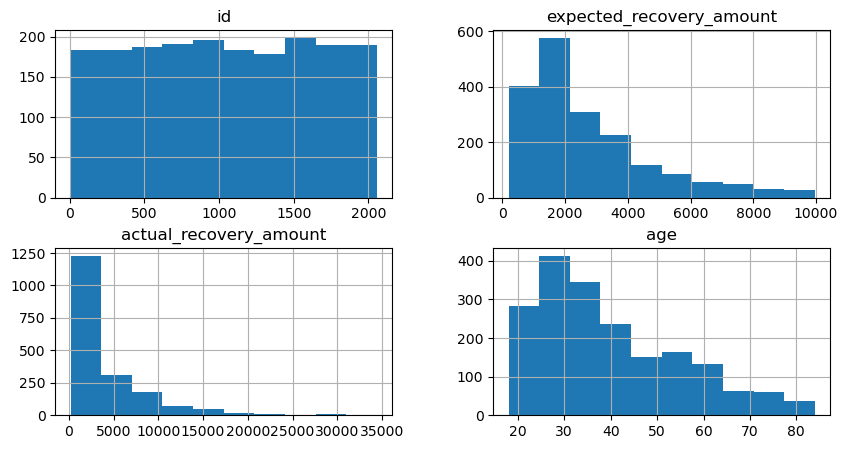

In [18]:
freqgraph = data.select_dtypes(include=['int','float'])
freqgraph.hist(figsize=(10,5))
plt.show()

# Visualisation using Heatmap

<AxesSubplot:>

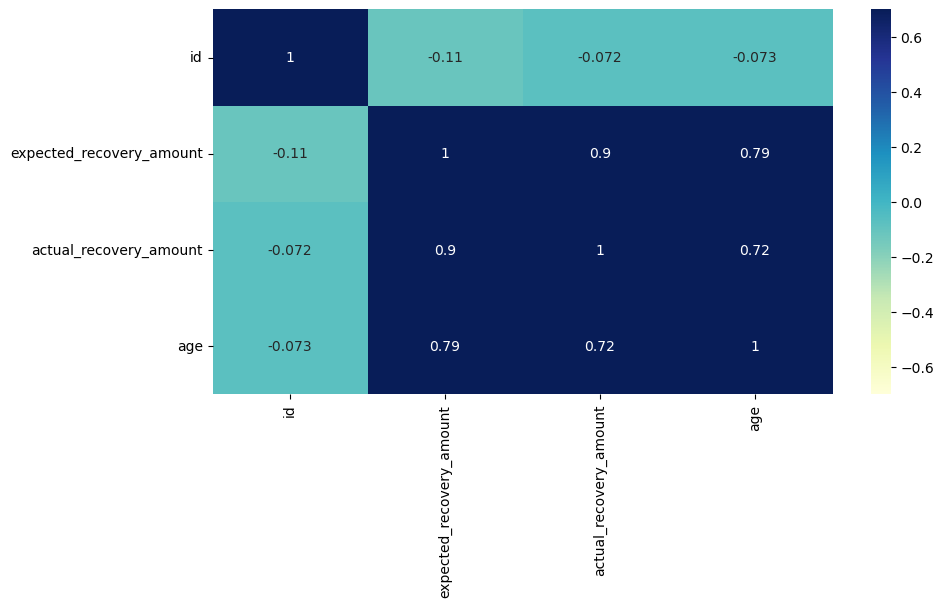

In [20]:
corrmatrix = data.corr()
plt.subplots(figsize=(10,5))
sns.heatmap(corrmatrix,annot=True,vmax=0.7,vmin=-0.7,cmap='YlGnBu')

# Plot - Recovery Strategy Level vs. Expected Recovery Amount

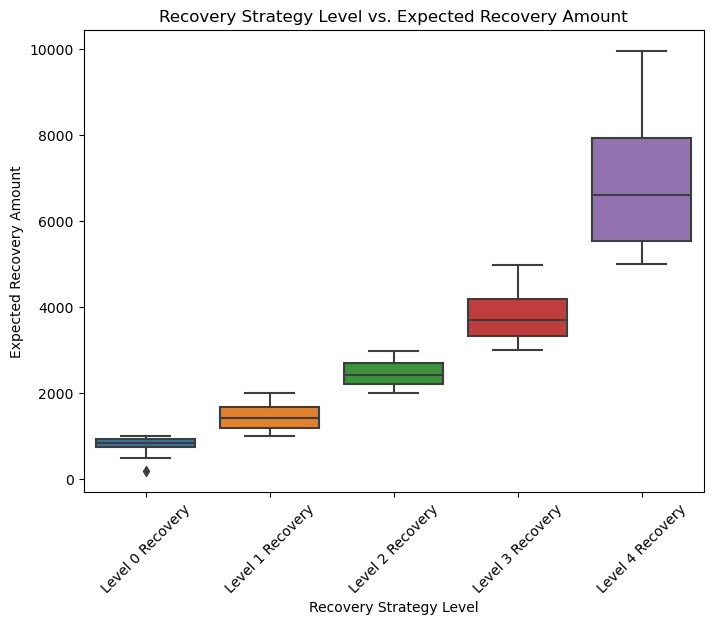

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Create a box plot to visualize the distribution of expected recovery amounts for each recovery strategy level
plt.figure(figsize=(8, 6))
ax = sns.boxplot(x='recovery_strategy', y='expected_recovery_amount', data=data)
ax.set_xlabel('Recovery Strategy Level')
ax.set_ylabel('Expected Recovery Amount')
ax.set_title('Recovery Strategy Level vs. Expected Recovery Amount')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()


# Graphical exploratory data analysis : age vs. expected recovery amount for all recovery levels

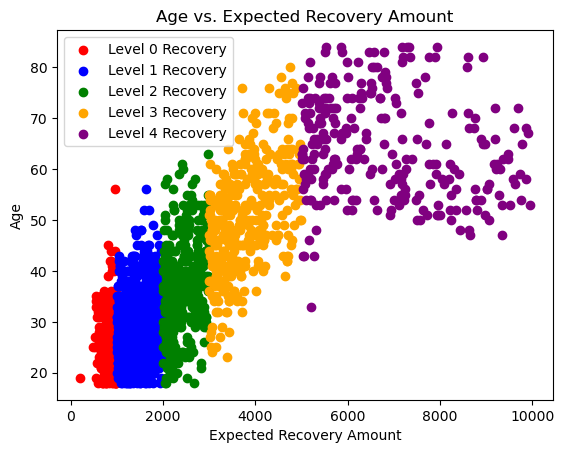

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, mannwhitneyu, chi2_contingency


# Scatter plot of age vs. expected recovery amount for all recovery levels

# Define colors or markers for each recovery level
level_colors = {
    'Level 0 Recovery': 'red',
    'Level 1 Recovery': 'blue',
    'Level 2 Recovery': 'green',
    'Level 3 Recovery': 'orange',
    'Level 4 Recovery': 'purple'
}

# Create a scatter plot for each recovery level in the same plot
for recovery_level, color in level_colors.items():
    level_data = data[data['recovery_strategy'] == recovery_level]
    plt.scatter(level_data['expected_recovery_amount'], level_data['age'], label=recovery_level, c=color)

# Set plot labels and title
plt.xlabel('Expected Recovery Amount')
plt.ylabel('Age')
plt.title('Age vs. Expected Recovery Amount')
plt.legend()
plt.show()


# Statistical test: age vs. expected recovery amount

In [23]:
import numpy as np
from scipy.stats import ttest_ind, mannwhitneyu

# Separate the data into two groups based on Expected Recovery Amounts
group_A = data[(data['expected_recovery_amount'] >= 900) & (data['expected_recovery_amount'] < 1000)]
group_B = data[(data['expected_recovery_amount'] > 1000) & (data['expected_recovery_amount'] <= 1100)]

# Perform the t-test for two independent samples (assuming normally distributed data)
t_stat, p_value = ttest_ind(group_A['age'], group_B['age'])

# Alternatively, perform the Mann-Whitney U test (for non-normally distributed data)
u_stat, p_value_mw = mannwhitneyu(group_A['age'], group_B['age'])

print(f"T-test: t-statistic = {t_stat}, p-value = {p_value}")
print(f"Mann-Whitney U test: U statistic = {u_stat}, p-value = {p_value_mw}")


T-test: t-statistic = -1.6142056008618746, p-value = 0.10822479656694209
Mann-Whitney U test: U statistic = 3544.5, p-value = 0.07570884886849544


# Statistical test: sex vs. expected recovery amount

In [36]:
from scipy.stats import chi2_contingency

# Create two subsets of data for each group
group_A = data[(data['expected_recovery_amount'] >= 900) & (data['expected_recovery_amount'] < 1000)]
group_B = data[(data['expected_recovery_amount'] > 1000) & (data['expected_recovery_amount'] <= 1100)]

# Count the number of males and females in each group
group_A_male_count = group_A[group_A['sex'] == 'Male'].shape[0]
group_A_female_count = group_A[group_A['sex'] == 'Female'].shape[0]
group_B_male_count = group_B[group_B['sex'] == 'Male'].shape[0]
group_B_female_count = group_B[group_B['sex'] == 'Female'].shape[0]

# Create a contingency table for the chi-square test
contingency_table = np.array([[group_A_male_count, group_A_female_count],
                              [group_B_male_count, group_B_female_count]])

# Perform the chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Statistic = {chi2_stat}")
print(f"P-value = {p_value}")


Chi-Square Statistic = 0.4134008672248815
P-value = 0.5202483871451236


Observation : The chi-square test will help determine if there is a significant difference in the percentage of male and female customers between the two groups (above and below the $1000 threshold). 


If the p-value is less than the chosen significance level (e.g., 0.05), then we can reject the null hypothesis, indicating that there is a significant association between sex and Expected Recovery Amount level. 


If the p-value is greater than the significance level, we cannot conclude a significant difference, and we can be more confident that the percentage of male and female customers does not jump across the $1000 threshold. Since here , the p - value is greater than 0.05, we conclude there is no significant differences.

# Exploratory graphical analysis: recovery amount

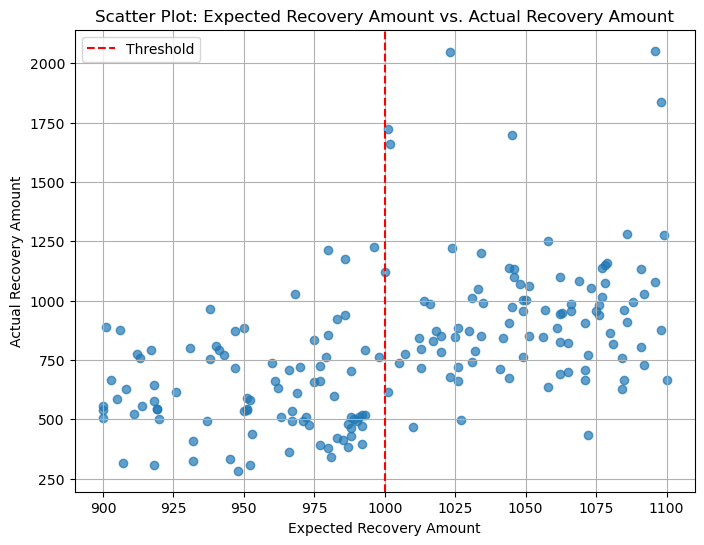

In [25]:
import matplotlib.pyplot as plt

# Assuming 'data' is a DataFrame containing the 'expected_recovery_amount' and 'actual_recovery_amount' columns

# Define the range of Expected Recovery Amounts to focus on
threshold = 1000
lower_range = 900
upper_range = 1100

# Filter the data to include only rows within the specified range
data_range = data[(data['expected_recovery_amount'] >= lower_range) & (data['expected_recovery_amount'] <= upper_range)]

# Create a scatter plot of Expected Recovery Amount vs. Actual Recovery Amount
plt.figure(figsize=(8, 6))
plt.scatter(data_range['expected_recovery_amount'], data_range['actual_recovery_amount'], alpha=0.7)
plt.axvline(x=threshold, color='red', linestyle='--', label='Threshold')
plt.xlabel('Expected Recovery Amount')
plt.ylabel('Actual Recovery Amount')
plt.title('Scatter Plot: Expected Recovery Amount vs. Actual Recovery Amount')
plt.legend()
plt.grid(True)
plt.show()


# Statistical analysis: recovery amount

In [26]:
from scipy.stats import kruskal

# Assuming 'data' is a DataFrame containing the 'expected_recovery_amount' and 'actual_recovery_amount' columns

# Define the two windows of expected recovery amount for the analysis
window_1_lower = 900
window_1_upper = 1100

window_2_lower = 950
window_2_upper = 1050

# Filter the data to include only rows within the first window
data_window_1 = data[(data['expected_recovery_amount'] >= window_1_lower) & (data['expected_recovery_amount'] <= window_1_upper)]

# Filter the data to include only rows within the second window
data_window_2 = data[(data['expected_recovery_amount'] >= window_2_lower) & (data['expected_recovery_amount'] <= window_2_upper)]

# Perform the Kruskal-Wallis test for each window
statistic_1, p_value_1 = kruskal(data_window_1['actual_recovery_amount'], data_window_1['expected_recovery_amount'])
statistic_2, p_value_2 = kruskal(data_window_2['actual_recovery_amount'], data_window_2['expected_recovery_amount'])

# Display the results
print(f"Results for window 1 (Expected Recovery Amount: ${window_1_lower} to ${window_1_upper}):")
print(f"Kruskal-Wallis Statistic: {statistic_1}")
print(f"P-value: {p_value_1}")

print("\n")

print(f"Results for window 2 (Expected Recovery Amount: ${window_2_lower} to ${window_2_upper}):")
print(f"Kruskal-Wallis Statistic: {statistic_2}")
print(f"P-value: {p_value_2}")


Results for window 1 (Expected Recovery Amount: $900 to $1100):
Kruskal-Wallis Statistic: 98.43345457373502
P-value: 3.361323971641858e-23


Results for window 2 (Expected Recovery Amount: $950 to $1050):
Kruskal-Wallis Statistic: 56.821597680846416
P-value: 4.7719656724510236e-14


# Regression modeling: no threshold

Linear Regression Model:
Mean Squared Error: 4141175.5302995024
R-squared: 0.8362344314672195


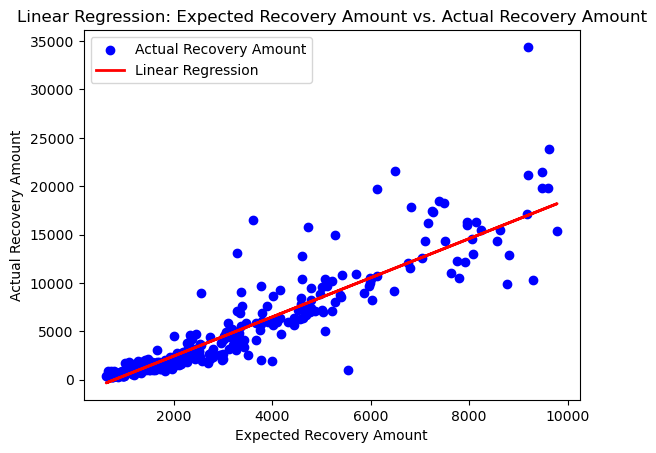

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'data' is a DataFrame containing the 'expected_recovery_amount' and 'actual_recovery_amount' columns

# Split the data into training and testing sets
X = data[['expected_recovery_amount']]
y = data['actual_recovery_amount']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = linear_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print("Linear Regression Model:")
print("Mean Squared Error:", mse)
print("R-squared:", r_squared)

# Plot the data points and the linear regression line
plt.scatter(X_test, y_test, color='blue', label='Actual Recovery Amount')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Linear Regression')
plt.xlabel('Expected Recovery Amount')
plt.ylabel('Actual Recovery Amount')
plt.title('Linear Regression: Expected Recovery Amount vs. Actual Recovery Amount')
plt.legend()
plt.show()


# Regression modeling: adding true threshold

Linear Regression Model with Threshold:
Mean Squared Error: 4094318.061011375
R-squared: 0.8380874415707112


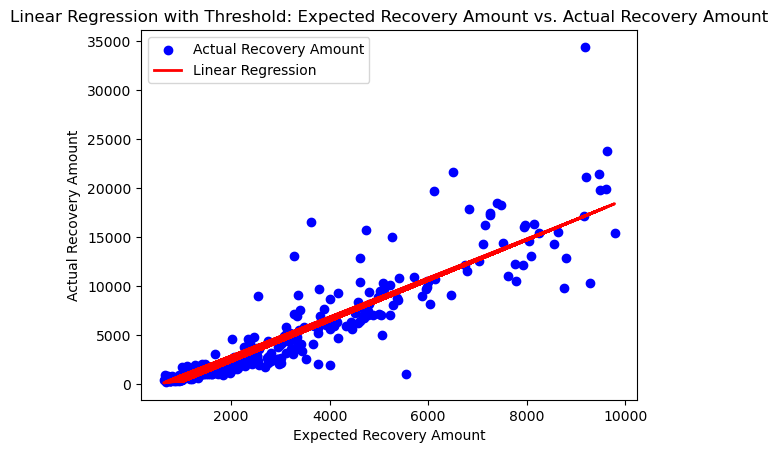

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'data' is a DataFrame containing the 'expected_recovery_amount' and 'actual_recovery_amount' columns

# Add an indicator variable for the true threshold
data['above_threshold'] = (data['expected_recovery_amount'] > 1000).astype(int)

# Split the data into training and testing sets
X = data[['expected_recovery_amount', 'above_threshold']]
y = data['actual_recovery_amount']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the linear regression model
linear_model_with_threshold = LinearRegression()
linear_model_with_threshold.fit(X_train, y_train)

# Make predictions on the test set
y_pred_with_threshold = linear_model_with_threshold.predict(X_test)

# Evaluate the model
mse_with_threshold = mean_squared_error(y_test, y_pred_with_threshold)
r_squared_with_threshold = r2_score(y_test, y_pred_with_threshold)

print("Linear Regression Model with Threshold:")
print("Mean Squared Error:", mse_with_threshold)
print("R-squared:", r_squared_with_threshold)

# Plot the data points and the linear regression line for both groups (above and below threshold)
plt.scatter(X_test['expected_recovery_amount'], y_test, color='blue', label='Actual Recovery Amount')
plt.plot(X_test['expected_recovery_amount'], y_pred_with_threshold, color='red', linewidth=2, label='Linear Regression')
plt.xlabel('Expected Recovery Amount')
plt.ylabel('Actual Recovery Amount')
plt.title('Linear Regression with Threshold: Expected Recovery Amount vs. Actual Recovery Amount')
plt.legend()
plt.show()


# Regression modeling: adjusting the window

In [40]:
import pandas as pd
import statsmodels.api as sm

# Filter the data for the range of $950 to $1050 for the expected recovery amount
data_adjusted_window = data[(data['expected_recovery_amount'] >= 950) & (data['expected_recovery_amount'] <= 1050)]

# Add a binary variable for the true threshold indicator based on the adjusted window
data_adjusted_window['above_1000_threshold'] = (data_adjusted_window['expected_recovery_amount'] > 1000).astype(int)

# Define the input (independent variables) and output (dependent variable) for the regression model with the adjusted window
X_adjusted = data_adjusted_window[['expected_recovery_amount', 'above_1000_threshold']]
y_adjusted = data_adjusted_window['actual_recovery_amount']

# Add a constant term to the input variables (intercept term for linear regression)
X_adjusted = sm.add_constant(X_adjusted)

# Create and fit the linear regression model with the adjusted window
model_with_threshold_adjusted = sm.OLS(y_adjusted, X_adjusted).fit()

# Print the summary of the model with the adjusted window
print(model_with_threshold_adjusted.summary())


                              OLS Regression Results                              
Dep. Variable:     actual_recovery_amount   R-squared:                       0.270
Model:                                OLS   Adj. R-squared:                  0.255
Method:                     Least Squares   F-statistic:                     17.90
Date:                    Fri, 21 Jul 2023   Prob (F-statistic):           2.42e-07
Time:                            18:33:35   Log-Likelihood:                -700.65
No. Observations:                     100   AIC:                             1407.
Df Residuals:                          97   BIC:                             1415.
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

C:\Users\Asus\AppData\Local\Temp\ipykernel_6288\2653446157.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_adjusted_window['above_1000_threshold'] = (data_adjusted_window['expected_recovery_amount'] > 1000).astype(int)


# Conclusion

Based on the analysis and results from the project, the conclusion is as follows:


The project analyzed the bank's efforts to collect money from customers who owed them.

Used different strategies based on the amount they expected to recover from each customer.

Looked at customers with expected amounts just above and just below $1000.

The analysis showed no significant age or gender differences between these groups, making them comparable.

Examined how much money was actually collected from customers in this range of expected amounts.

This increase in collections was significantly higher than the extra cost of the higher recovery strategy ($50 per customer).

Checked if this result was consistent with a slightly different range of expected amounts.

The findings confirmed that the higher recovery strategy was successful and worth the investment.

In conclusion, the bank's efforts to collect money worked well, and they managed to get more money from customers with higher expected amounts, making it a successful and profitable strategy.
